In [1]:
import numpy as np
import copy
import itertools
import random
import matplotlib.pyplot as plt
import time

import RL_treasure_map as rl

In [2]:
# Define environment manually
treasure_map = np.array([
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  1,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  1,  1,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1,  0, -1,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
])

start_point = np.array([1,0])

end_point = np.array([8,6])

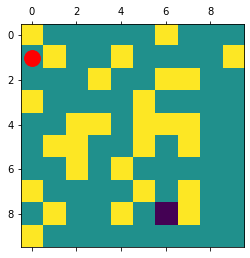

In [3]:
# The current point becomes the starting point
current_point = copy.deepcopy(start_point)

# Get current state
current_state = rl.get_current_state(current_point = start_point, treasure_map= treasure_map)

# Create dict with initial state
state_space_dict = dict({0:current_state})
# Create initiall policy table
Q_table = np.zeros((1, 4))

# Merge dict and table to tuple
Q_elem = (Q_table, state_space_dict)

# Show treasure map
plt.matshow(treasure_map)
plt.scatter(start_point[1],start_point[0], color='r', s=250)
plt.show()

In [4]:
# train an agent in one environment
# change epsilon over time
n_iter = 10000

rewards_per_step = []
for i in range(n_iter):
    Q_elem, sum_of_rewards = rl.q_learning(treasure_map=treasure_map,
                        Q_elem=Q_elem,
                        current_state=current_state,
                        current_point=current_point,
                        end_point=end_point,
                        alpha = 0.1,
                        gamma=0.8,
                        epsilon=(n_iter-1)*0.6/n_iter)
    rewards_per_step.append(sum_of_rewards)
    print('\rProgress: '+str(i+1)+'/'+str(n_iter), end='', flush=True)

Progress: 10000/10000

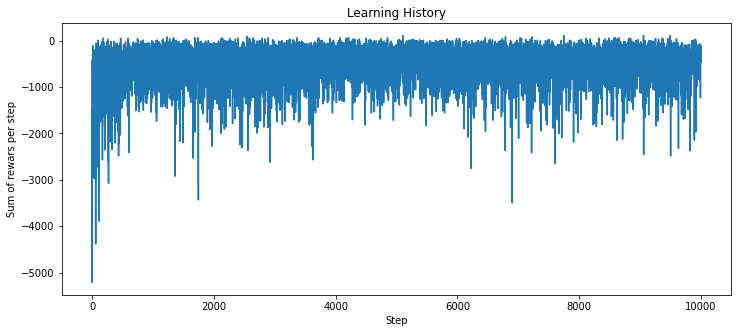

In [5]:
fig = plt.figure(figsize=(12, 5))
plt.plot(rewards_per_step)
plt.xlabel('Step')
plt.ylabel('Sum of rewars per step')
plt.title('Learning History')
plt.show()

In [6]:
# What has the agent learned?
rl.show_results(np.random.randint(0, len(Q_elem[1]), size=1).item(), Q_elem)
rl.show_results(np.random.randint(0, len(Q_elem[1]), size=1).item(), Q_elem)
rl.show_results(np.random.randint(0, len(Q_elem[1]), size=1).item(), Q_elem)
rl.show_results(np.random.randint(0, len(Q_elem[1]), size=1).item(), Q_elem)

STATE: (0, 0, 1, 0, 0, 0, 0, 0)
[['0' '0' '1']
 ['0' 'X' '0']
 ['0' '0' '0']]
[ 3.73000338 17.54543185 14.31837098 28.68437487]


STATE: (1, 1, 1, 1, 1, 0, 0, 0)
[['1' '1' '1']
 ['1' 'X' '1']
 ['0' '0' '0']]
[-16.68360027  63.41400703 -16.32694735 -36.41502283]


STATE: (-9, 1, 0, -9, 1, -9, 0, 0)
[['-9' '1' '0']
 ['-9' 'X' '1']
 ['-9' '0' '0']]
[-50.18535735   3.27277977   0.         -46.5814733 ]


STATE: (0, 1, 0, 0, 0, 0, 1, 1)
[['0' '1' '0']
 ['0' 'X' '0']
 ['0' '1' '1']]
[-51.90207527 -51.74909127  -7.61207806  -2.60288911]




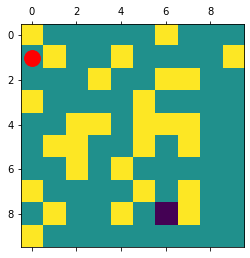

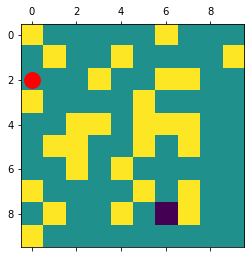

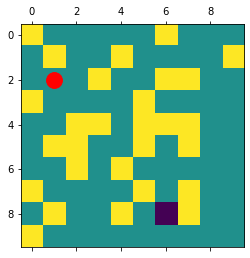

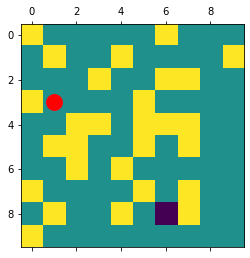

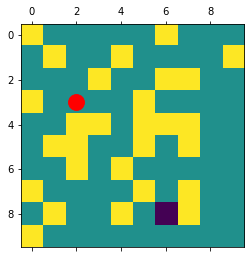

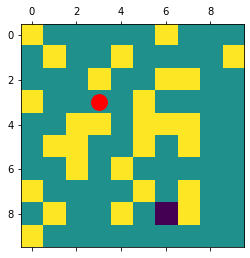

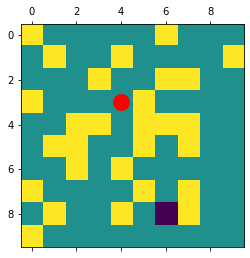

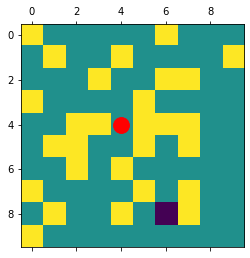

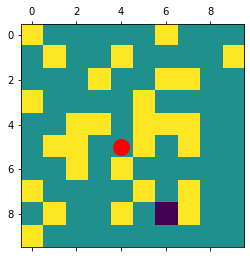

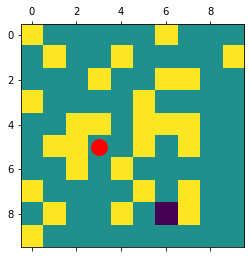

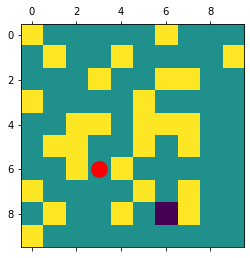

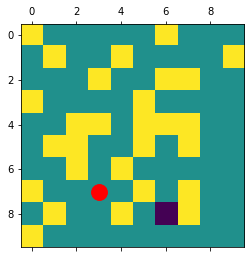

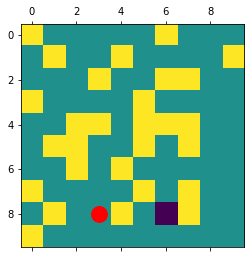

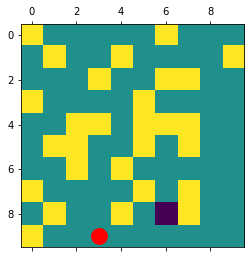

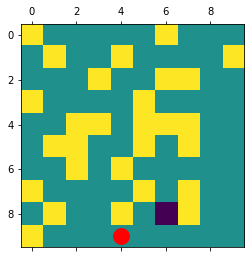

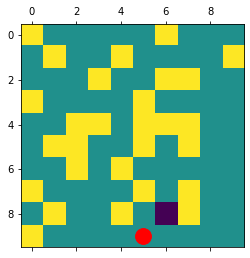

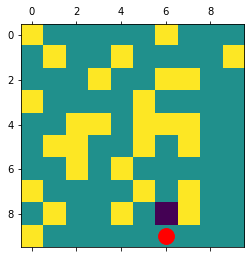

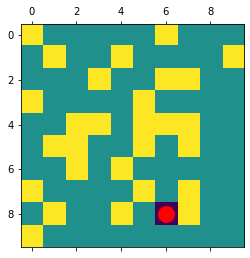

In [7]:
# How he is doing on the same map he learned?
rl.play_game(treasure_map=treasure_map,
             Q_elem=Q_elem,
             start_point=start_point,
             end_point=end_point)